This notebook recreates  Fig. 15 in Merdith et al. (2017) 'A full-plate global reconstruction of the Neoproterozoic. Also Figs. 7 and 8 in Matthews et al. (2016), Fig. 2 in Mallard et al. (2016) and Figs. 1,2 and 6 in Morra et al. (2013).

It calculates the number and area of plates (not continents, but actual tectonic plates) present through time in a plate model and plots them against each other to see how plate count and size change as a function of time.

It should be (reasonably) adaptable for all times, provided you have a plate model with plate boundaries.

In [2]:
import pygplates
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.cm as cm
%matplotlib inline

In [6]:
#setbasedir for loading reconstruction files
basedir = '/Users/Andrew/Documents/PhD/Scripts/Python_Scripts/pyGPlates_examples/Merdith_2017_GR/Sample_data/'

#Merdith (Mer17) model
Mer17_rotation_model = pygplates.RotationModel('%sMer17_1000-520Ma_rotations.rot' % basedir)
Mer17_polygons = pygplates.FeatureCollection('%sMer17_1000-520Ma_shapes.gpml' % basedir)
Mer17_topology_features = ['%sMer17_1000-520Ma_Convergence.gpml' % basedir,
                     '%sMer17_1000-520Ma_Divergence.gpml' % basedir,
                     '%sMer17_1000-520Ma_Topologies.gpml' % basedir,
                     '%sMer17_1000-520Ma_Transform.gpml' % basedir]

#Matthews (Mat16) model now, note that topologies and plate boundaries are all rolled into single files for this model
#and that you need the topologybuildingblocks file as well
Mat16_rotation_model = pygplates.RotationModel('%sMat16_410-0Ma.rot' % basedir)
Mat16_polygons = pygplates.FeatureCollection('%sMat16_PresentDay_ContinentalPolygons.gpml' % basedir)
Mat16_topology_features = ['%sMat16_Mesozoic-Cenozoic_plate_boundariesl.gpml' % basedir,
                           '%sMat16_Paleozoic_plate_boundaries.gpml' % basedir,
                           '%sMat16_TopologyBuildingBlocks.gpml' % basedir]

In [60]:
#Mer17 model 
#store final results
Mer17_plate_area = []
Mer17_num_plates = []

for time in np.arange(520, 1005, 5):
    #print time
    #initialise some lists to store results for each time
    tmp_plate_area = []
    tmp_num_plates = []

    #Resolve our topological plate polygons to the current time
    #NB as we don't need specific boundaries, we don't need shared boundaries
    resolved_topologies = []
    pygplates.resolve_topologies(Mer17_topology_features, Mer17_rotation_model, resolved_topologies, time)

    # We will accumulate the total area and subduction length proportion for the current 'time'.
    total_area = 0
    total_subduction_length_proportion = 0

    # Iterate over the resolved topologies.
    for resolved_topology in resolved_topologies:

        # Topological plate polygons and deforming networks have a boundary polygon with an area.
        total_area = resolved_topology.get_resolved_boundary().get_area()
    
        # The area is for a unit-length sphere so we must multiply by the Earth's radius squared.
        total_area_in_sq_kms = total_area * pygplates.Earth.mean_radius_in_kms * pygplates.Earth.mean_radius_in_kms
        tmp_plate_area.append(total_area_in_sq_kms)
    
    #get the number of plates
    i = len(resolved_topologies)
    #make it from 1 --> no. of topolgoies (python indexing starts at 0)
    j = range(1,i+1)

    #sort results in descending order            
    tmp_plate_area.sort(reverse=True)  
    Mer17_plate_area.append(tmp_plate_area)
    Mer17_num_plates.append(j)


In [116]:
#Mat16 model, this one takes longer to run becuase it's more complex
#store final results
Mat16_plate_area = []
Mat16_num_plates = []

for time in np.arange(0, 415, 5):
    #print time
    # Resolve our topological plate polygons (and deforming networks) to the current 'time'.
    resolved_topologies = []
    tmp_plate_area = []
    pygplates.resolve_topologies(Mat16_topology_features, Mat16_rotation_model, resolved_topologies, time)

    # We will accumulate the total area and subduction length proportion for the current 'time'.
    total_area = 0
    total_subduction_length_proportion = 0

    # Iterate over the resolved topologies.
    for resolved_topology in resolved_topologies:

        # Topological plate polygons and deforming networks have a boundary polygon with an area.
        total_area = resolved_topology.get_resolved_boundary().get_area()
    
        # The area is for a unit-length sphere so we must multiple by the Earth's radius squared.
        total_area_in_sq_kms = total_area * pygplates.Earth.mean_radius_in_kms * pygplates.Earth.mean_radius_in_kms
        tmp_plate_area.append(total_area_in_sq_kms)
        
    #get the number of plates
    i = len(resolved_topologies)
    #make it from 1 --> no. of topolgoies (python indexing starts at 0)
    j = range(1,i+1)

    #sort results in descending order
    tmp_plate_area.sort(reverse=True)  
    Mat16_plate_area.append(tmp_plate_area)
    Mat16_num_plates.append(j)

In [117]:
#plotting parameters
Mer17_time = np.arange(520,1005,5)
Mat16_time = np.arange(0, 415, 5)
Mer17_cbar_tick_marks = range(520,1040,40) #>.>
Mat16_cbar_tick_marks = range(0,410,40)
cm = plt.get_cmap('viridis')

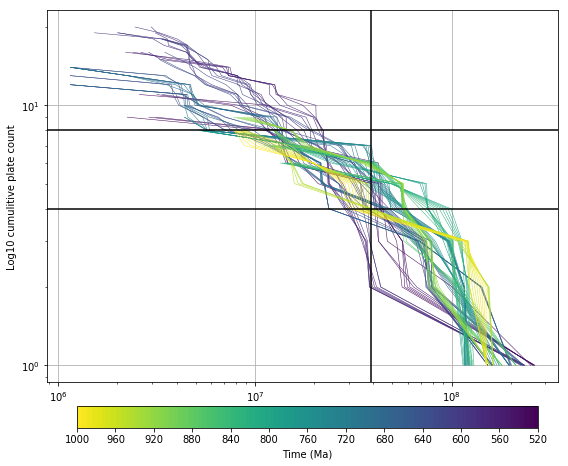

In [118]:
fig, ax = plt.subplots(num=None, figsize=(8, 6))
#need to create a mappable colour map in order colour things by time (i think, i find this part of 
#matplotlib confusing)
norm = mpl.colors.Normalize(vmin=520, vmax=1000)
m = plt.cm.ScalarMappable(norm=norm, cmap=cm)
#loop through our three variables and colour appropriately
for x,y,z in zip(Mer17_plate_area,Mer17_num_plates,Mer17_time): 
    color1 = m.to_rgba(z)
    f1 = ax.plot(x,y,c=color1, linewidth=0.5)
#some inflexion points after Mallard et al. (2016) and Matthews et al. (2016)
ax.axhline(8, color='k')
ax.axhline(4, color='k')
ax.axvline(10**7.59, color='k')
#we want log axes
ax.semilogy()   
ax.semilogx()   
#set grid
ax.grid(True)

#labels etc.
ax.set_xlabel('Log10 plate area (km2)')
ax.set_ylabel('Log10 cumulitive plate count')
ax.tick_params(axis='y')
ax.tick_params(axis='x')
#colourbar :*(
cbax = fig.add_axes([0.14, 0, .8, 0.05])
cb = fig.colorbar(CS3, cax=cbax, orientation='horizontal')
cb.set_label('Time (Ma)')
cb.set_ticks(Mer17_cbar_tick_marks)
cb.ax.invert_xaxis()
plt.tight_layout()

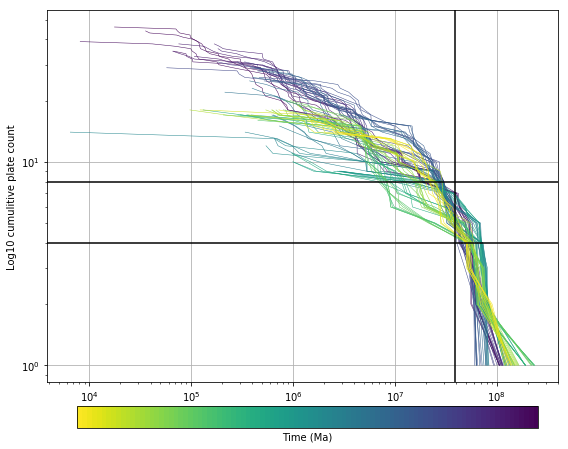

In [119]:
fig, ax = plt.subplots(num=None, figsize=(8, 6))
#need to create a mappable colour map in order colour things by time (i think, i find this part of 
#matplotlib confusing)
norm = mpl.colors.Normalize(vmin=0, vmax=410)
m = plt.cm.ScalarMappable(norm=norm, cmap=cm)
#loop through our three variables and colour appropriately
for x,y,z in zip(Mat16_plate_area,Mat16_num_plates,Mat16_time): 
    color1 = m.to_rgba(z)
    f1 = ax.plot(x,y,c=color1, linewidth=0.5)
#some inflexion points after Mallard et al. (2016) and Matthews et al. (2016)
ax.axhline(8, color='k')
ax.axhline(4, color='k')
ax.axvline(10**7.59, color='k')
#we want log axes
ax.semilogy()   
ax.semilogx()   
#set grid
ax.grid(True)

#labels etc.
ax.set_xlabel('Log10 plate area (km2)')
ax.set_ylabel('Log10 cumulitive plate count')
ax.tick_params(axis='y')
ax.tick_params(axis='x')
#colourbar :*(
cbax = fig.add_axes([0.14, 0, .8, 0.05])
cb = fig.colorbar(CS3, cax=cbax, orientation='horizontal')
cb.set_label('Time (Ma)')
cb.set_ticks(Mat16_cbar_tick_marks)
cb.ax.invert_xaxis()
plt.tight_layout()

In [121]:
#Now for fig. 15c in Mer17
#organise plates into groupings
Mer17_four_plates = []
Mer17_five_plates = []
for Mer17_plate in Mer17_plate_area:
    Mer17_four_plates.append(np.std(Mer17_plate[:4]))
    Mer17_five_plates.append(np.std(Mer17_plate[:5]))
Mat16_four_plates = []
Mat16_five_plates = []
for Mat16_plate in Mat16_plate_area:
    Mat16_four_plates.append(np.std(Mat16_plate[:4]))
    Mat16_five_plates.append(np.std(Mat16_plate[:5]))

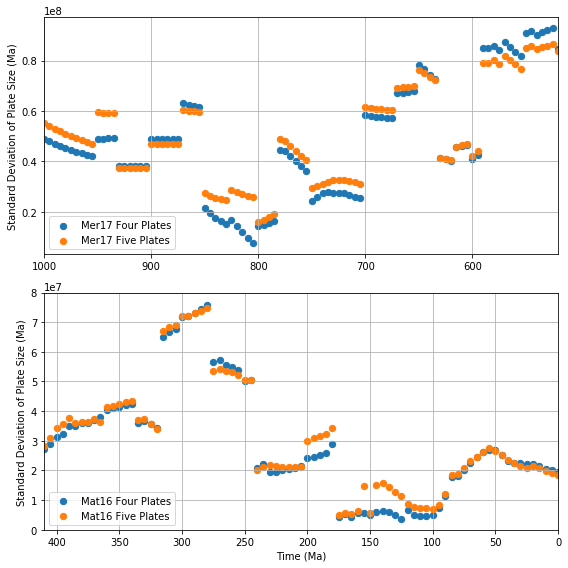

In [126]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(8,8))
ax1.scatter(Mer17_time, Mer17_four_plates, label='Mer17 Four Plates', s=40)
ax1.scatter(Mer17_time, Mer17_five_plates, label='Mer17 Five Plates', s=40)
ax2.scatter(Mat16_time, Mat16_four_plates, label='Mat16 Four Plates', s=40)
ax2.scatter(Mat16_time, Mat16_five_plates, label='Mat16 Five Plates', s=40)
ax1.set_xlim(1000,520)
ax2.set_xlim(410,0)
ax1.grid(True)
ax2.grid(True)
ax2.set_xlabel('Time (Ma)')
ax1.set_ylabel('Standard Deviation of Plate Size (Ma)')
ax2.set_ylabel('Standard Deviation of Plate Size (Ma)')
ax1.legend(loc=3)
ax2.legend(loc=3)
plt.tight_layout()